## **Predict Stock Prices with LSTM**
Goal: Use an LSTM neural network to predict the closing price of a stock using its past data.

**Install Required Libraries**

In [3]:
!pip install pandas yfinance scikit-learn matplotlib tensorflow
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

**Load Historical Stock Data**

<ipython-input-4-4028833704>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


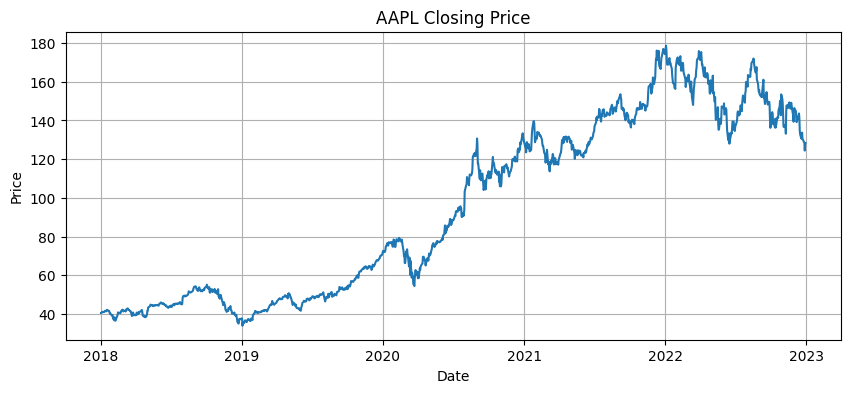

In [4]:
# Download past 5 years of AAPL data
df = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
# Keep only the closing prices
data = df[['Close']].copy()
data.dropna(inplace=True)
# Plot the closing price
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

**Normalize the Data**

In [7]:
# Normalize values to range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

**Create Time-Series Sequences**

In [8]:
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
  X.append(scaled_data[i-sequence_length:i, 0])
  y.append(scaled_data[i, 0])
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)
# Reshape to (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1199, 60, 1)
y shape: (1199,)


**Split into Train and Test Sets**

In [10]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Build and Train the LSTM Model**

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predict the closing price

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0487 - val_loss: 0.0075
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0

**Evaluate and Plot Predictions**

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


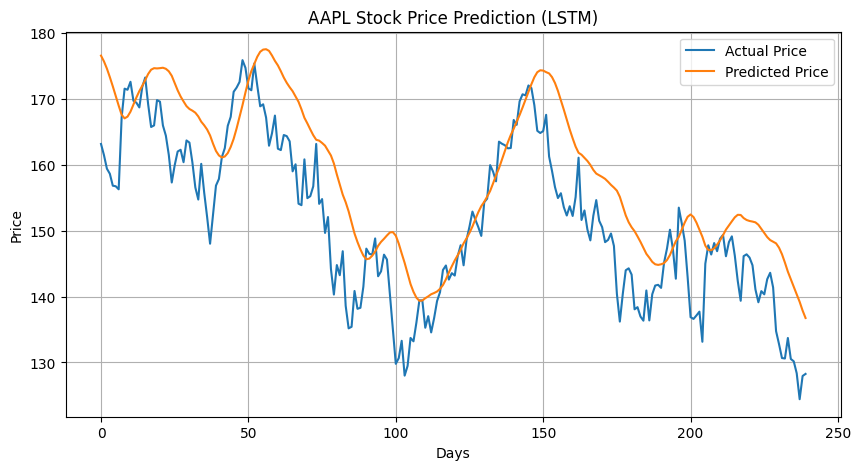

In [12]:
# Predict on test data
predictions = model.predict(X_test)
# Inverse scale the predictions
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('AAPL Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## **Summary**
This project demonstrates how to build and train an LSTM (Long Short-Term Memory) neural network to predict future stock prices using historical data from Apple Inc. (AAPL)


*   📦 Data fetched via yfinance (2018–2023)
*   🔄 Data normalized and split into training/test sets
*   🧠 LSTM model with 2 layers + dropout to prevent overfitting
*   🧪 Trained using past 60 days to predict the next day's price
*   📊 Actual vs. predicted prices are plotted for evaluation